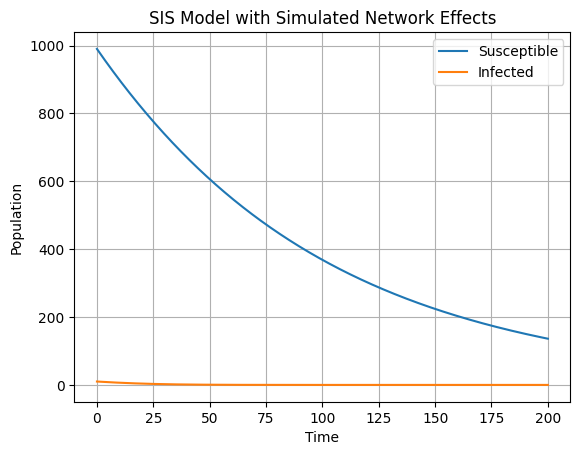

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Population parameters
N = 1000  # Total population, assumed constant for simplicity

# Disease progression parameters
gamma = 0.1  # Recovery rate
Lambda = 0.01  # Rate of arrival (birth/immigration) into the population
mu = 0.01  # Natural departure rate (death/emigration)

# Basic "graphon" function to simulate network effects
def graphon_effect(S, I, beta_base=0.05):
    """Modulates the base transmission rate to simulate higher or lower transmission
    rates due to changing network structures."""
    return beta_base * (1 + 0.5 * np.sin((S + I) / N))

# Initial conditions
I0 = 10  # Initially infected individuals
S0 = N - I0  # Rest are susceptible

# System of differential equations defining the SIS model
def sis_model(t, y):
    S, I = y
    beta = graphon_effect(S, I)  # Calculate beta using the graphon effect function
    dSdt = Lambda - beta * S * I / N - mu * S + gamma * I
    dIdt = beta * S * I / N - (gamma + mu) * I
    return [dSdt, dIdt]

# Time span for the simulation
t_span = [0, 200]
t_eval = np.linspace(*t_span, 1000)

# Solve the system
sol = solve_ivp(sis_model, t_span, [S0, I0], t_eval=t_eval)

# Plotting the results
plt.plot(sol.t, sol.y[0], label="Susceptible")
plt.plot(sol.t, sol.y[1], label="Infected")

plt.title("SIS Model with Simulated Network Effects")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.show()